In [2]:
%reload_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

module_path = os.path.abspath(os.path.join('./../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.multicovariate_models.GroupsModelWrapper import GroupsModelWrapper
from src.multicovariate_models.DataLoader import DataLoader

In [3]:
%%time

base_dir = '../../'
df = pd.read_csv(os.path.join(base_dir, "data/dataframes/simulations-step0.1.csv"))
df = df.drop(columns=["origin_file"]).drop_duplicates()
"""main_df = main_df[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'J-Apollo', 'J-RN2',
       'J-RN1', 'node_with_leak']].round(3).drop_duplicates()"""
df['leak_amount'] = df['leak_amount'].str[:-3].astype(float)

# drop all the `dpressure` columns
display(df)

,Sensor1,Sensor2,Sensor3,Sensor4,J-Apollo,J-RN2,J-RN1,node_with_leak,leak_amount,Sensor1_dpressure,Sensor2_dpressure,Sensor3_dpressure,Sensor4_dpressure,J-Apollo_dpressure,J-RN2_dpressure,J-RN1_dpressure
0,14.8003,15.9386,17.9611,19.3182,15.4271,15.9507,19.8981,Node_275-A,0.50,0.0134,0.0153,0.0082,0.0031,0.0,0.0006,0.0
1,14.7989,15.9371,17.9603,19.3179,15.4271,15.9507,19.8981,Node_275-A,0.55,0.0148,0.0168,0.0090,0.0034,0.0,0.0007,0.0
2,14.7976,15.9357,17.9595,19.3175,15.4271,15.9506,19.8981,Node_275-A,0.60,0.0162,0.0182,0.0098,0.0038,0.0,0.0007,0.0
3,14.7962,15.9342,17.9587,19.3172,15.4271,15.9505,19.8981,Node_275-A,0.65,0.0175,0.0197,0.0106,0.0041,0.0,0.0008,0.0
4,14.8045,15.9459,17.9640,19.3176,15.4271,15.9506,19.8981,Node_258-A,0.50,0.0093,0.0080,0.0053,0.0037,0.0,0.0007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71994,14.7454,15.8914,17.9136,18.9397,15.4271,15.9221,19.8981,Node_Jonctiune-1225,10.00,0.0684,0.0625,0.0557,0.3816,0.0,0.0292,0.0
71995,14.7450,15.8911,17.9133,18.9370,15.4271,15.9219,19.8981,Node_Jonctiune-1225,10.05,0.0688,0.0628,0.0561,0.3843,0.0,0.0294,0.0
71997,14.5343,15.5478,17.6992,19.2515,15.4271,15.9396,19.8981,Node_Jonctiune-267,9.95,0.2795,0.4061,0.2701,0.0697,0.0,0.0117,0.0
71998,14.5326,15.5450,17.6974,19.2512,15.4271,15.9396,19.8981,Node_Jonctiune-267,10.00,0.2811,0.4089,0.2719,0.0701,0.0,0.0117,0.0


CPU times: user 304 ms, sys: 60 ms, total: 364 ms
Wall time: 381 ms


In [4]:
# print the node IDs

df.node_with_leak.unique()

array(['Node_275-A', 'Node_258-A', 'Node_255-A', 'Node_J-1640',
       'Node_Jonctiune-J-34', 'Node_Jonctiune-J-32',
       'Node_Jonctiune-J-31', 'Node_Jonctiune-J-27',
       'Node_Jonctiune-J-26', 'Node_Jonctiune-J-25',
       'Node_Jonctiune-J-23', 'Node_Jonctiune-12588',
       'Node_Jonctiune-J-21', 'Node_Jonctiune-J-20',
       'Node_Jonctiune-J-19', 'Node_Jonctiune-J-16',
       'Node_Jonctiune-J-15', 'Node_PT1', 'Node_PT4', 'Node_PT3',
       'Node_Jonctiune-J-3', 'Node_Jonctiune-J-1', 'Node_Jonctiune-12372',
       'Node_Jonctiune-4743', 'Node_Jonctiune-4742',
       'Node_Jonctiune-4731', 'Node_Jonctiune-4723', 'Node_J-RN2',
       'Node_Jonctiune-4619', 'Node_Jonctiune-4618',
       'Node_Jonctiune-4615', 'Node_-', 'Node_Jonctiune-4602',
       'Node_Jonctiune-4595', 'Node_Jonctiune-3972',
       'Node_Jonctiune-3967', 'Node_Jonctiune-3961',
       'Node_Jonctiune-3956', 'Node_Jonctiune-3920',
       'Node_Jonctiune-3917', 'Node_Jonctiune-3913',
       'Node_Jonctiune-3566'

---------------------------------------------


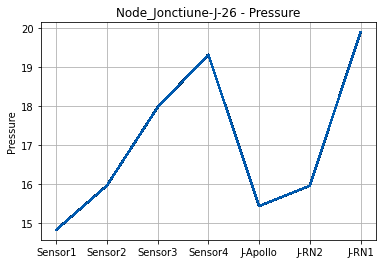

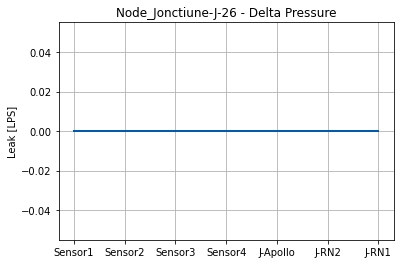

---------------------------------------------


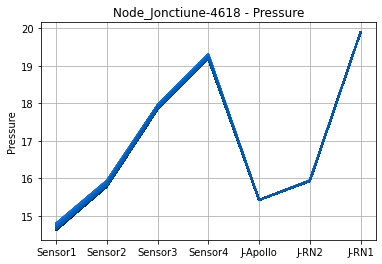

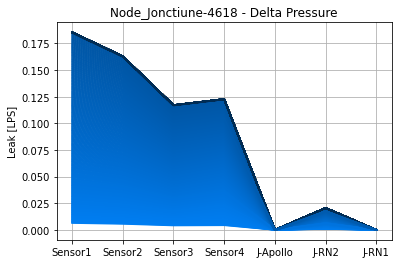

---------------------------------------------


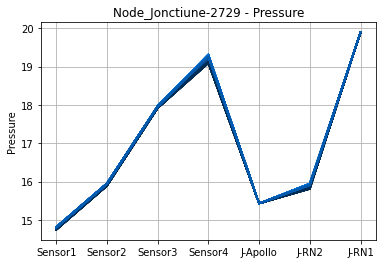

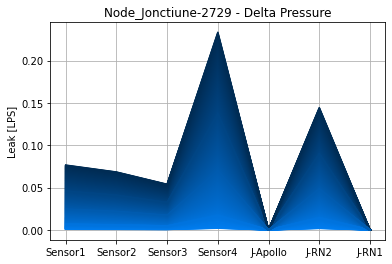

---------------------------------------------


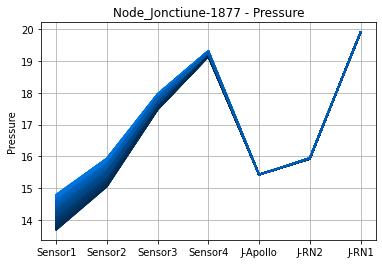

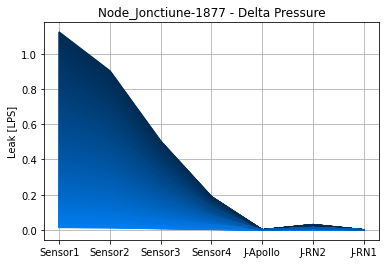

---------------------------------------------


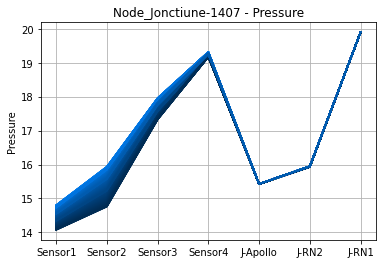

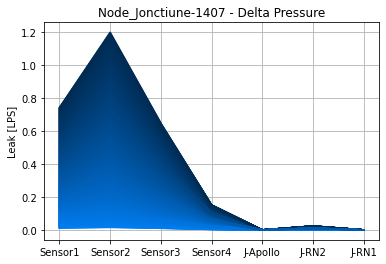

---------------------------------------------


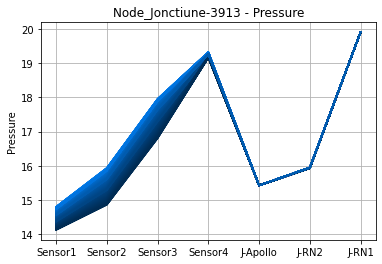

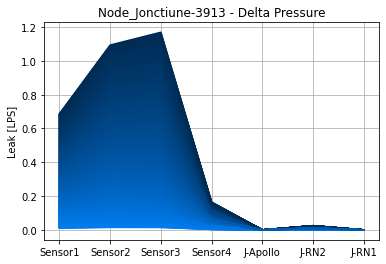

---------------------------------------------


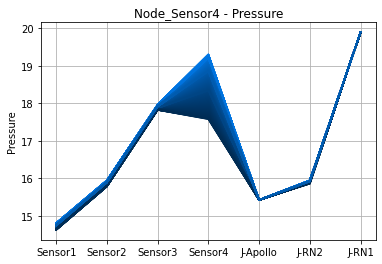

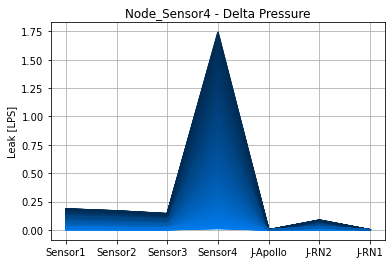

---------------------------------------------


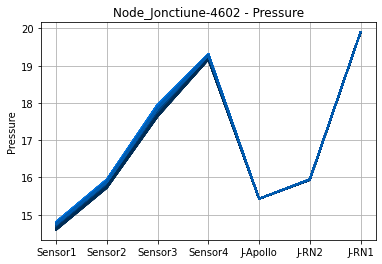

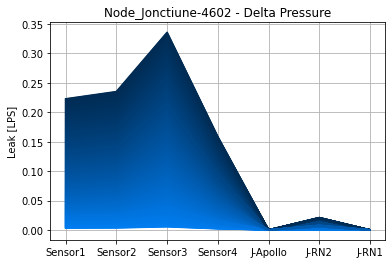

---------------------------------------------


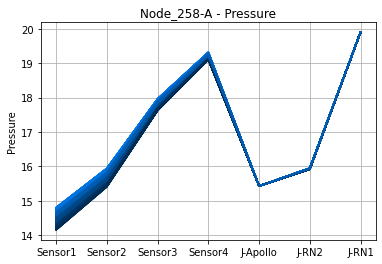

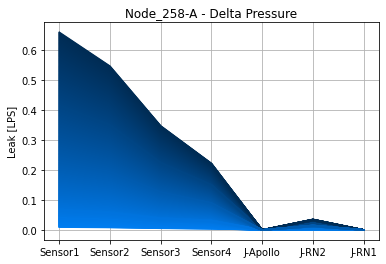

---------------------------------------------


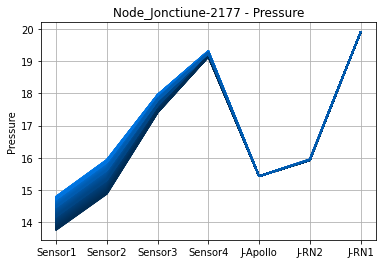

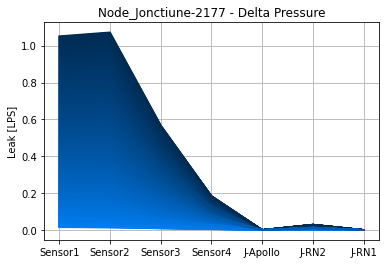

In [26]:
import matplotlib.pyplot as plt
import matplotlib

node_id_vec = [
    'Node_Jonctiune-J-26',
    'Node_Jonctiune-4618',
    'Node_Jonctiune-2729',
    'Node_Jonctiune-1877',
    'Node_Jonctiune-1407',
    'Node_Jonctiune-3913',
    'Node_Sensor4',
    'Node_Jonctiune-4602',
    'Node_258-A',
    'Node_Jonctiune-2177'
]

def get_color_rgb(mn_val, mx_val, val):
    val_scaled = (val - mn_val) / (mx_val - mn_val)
    mx_value = 0.95
    mn_value = 0.33
    color_hsv = (0.58, 1, mx_value - val_scaled*(mx_value - mn_value))
    color_rgb = matplotlib.colors.hsv_to_rgb(color_hsv)
    return color_rgb
    

for node_id in node_id_vec:
    df_node = df[df.node_with_leak == node_id]
    leak_amount_vec = df_node.leak_amount.to_numpy(dtype=float)
    sensor_pressure_mat = df_node[DataLoader.SENSOR_COLS].to_numpy(dtype=float)
    sensor_dpressure_response_mat = df_node[DataLoader.SENSOR_DPRESSURE_COLS].to_numpy(dtype=float)
    
    mn_leak = np.min(leak_amount_vec)
    mx_leak = np.max(leak_amount_vec)
    
    print('---------------------------------------------')
    
    for rowN, leak_amount in enumerate(leak_amount_vec):
        sensor_pressure_vec = sensor_pressure_mat[rowN, :]
        
        color_rgb = get_color_rgb(mn_leak, mx_leak, leak_amount)
        
        plt.plot(DataLoader.SENSOR_COLS, sensor_pressure_vec, color=color_rgb)
        plt.grid()
        plt.title(node_id + ' - Pressure')
        plt.ylabel('Pressure')
    
    plt.show()
    
    for rowN, leak_amount in enumerate(leak_amount_vec):
        sensor_dpressure_vec = sensor_dpressure_response_mat[rowN, :]
        
        color_rgb = get_color_rgb(mn_leak, mx_leak, leak_amount)
        
        plt.plot(DataLoader.SENSOR_COLS, sensor_dpressure_vec, color=color_rgb)
        plt.grid()
        plt.title(node_id + ' - Delta Pressure')
        plt.ylabel('Leak [LPS]')
    
    plt.show()

---------------------------------------------


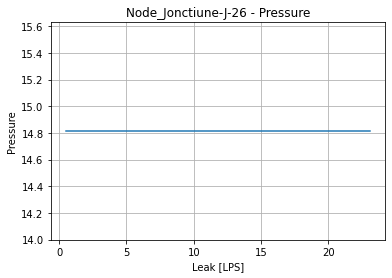

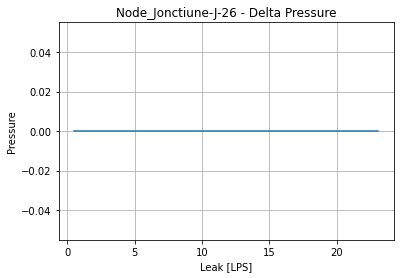

---------------------------------------------


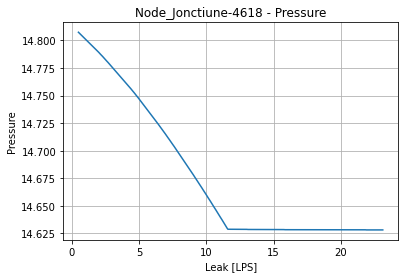

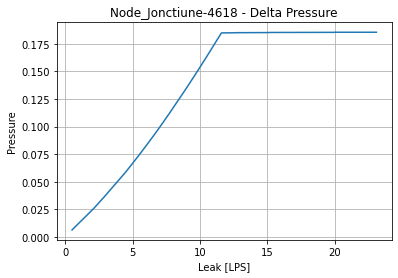

---------------------------------------------


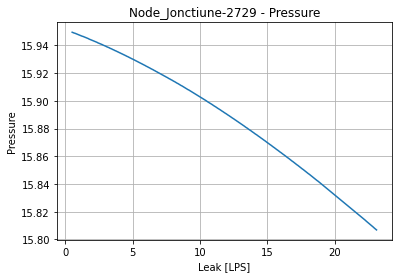

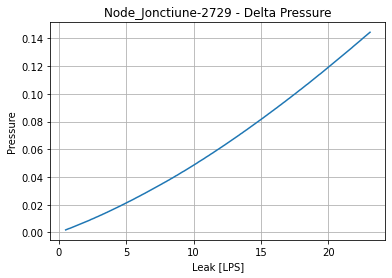

---------------------------------------------


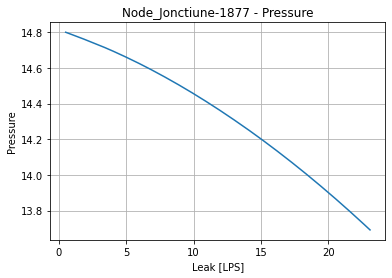

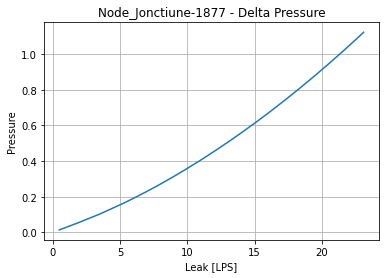

---------------------------------------------


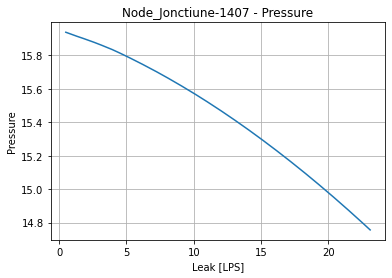

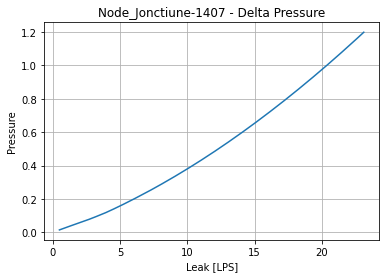

---------------------------------------------


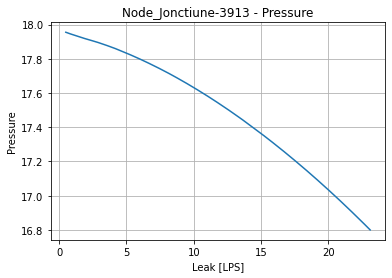

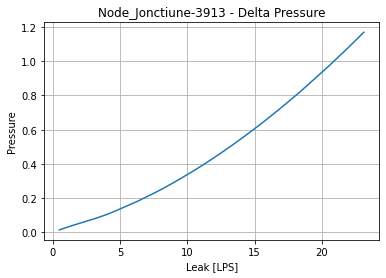

---------------------------------------------


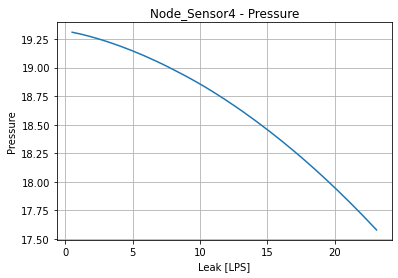

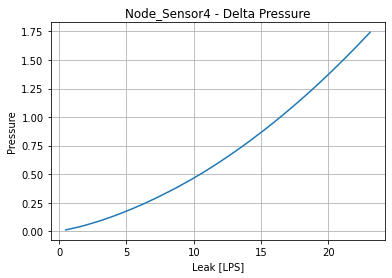

---------------------------------------------


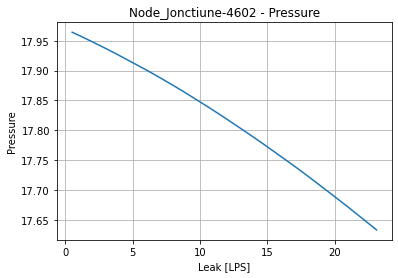

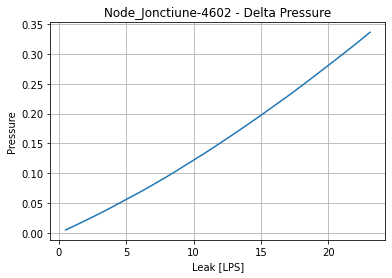

---------------------------------------------


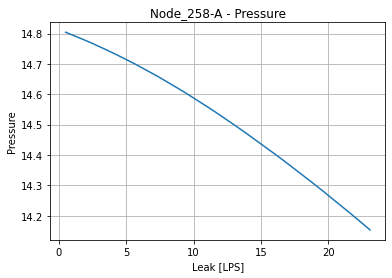

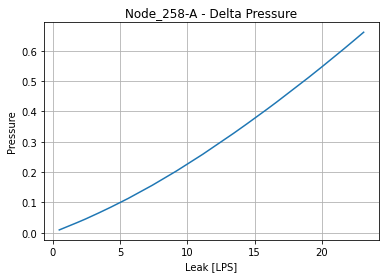

In [25]:
# investogate how the response at a single sensor is dependent on the leak amount

node_id_sensor_id_vec = [
    ('Node_Jonctiune-J-26', 'Sensor1'),
    ('Node_Jonctiune-4618', 'Sensor1'),
    ('Node_Jonctiune-2729', 'J-RN2'),
    ('Node_Jonctiune-1877', 'Sensor1'),
    ('Node_Jonctiune-1407', 'Sensor2'),
    ('Node_Jonctiune-3913', 'Sensor3'),
    ('Node_Sensor4', 'Sensor4'),
    ('Node_Jonctiune-4602', 'Sensor3'),
    ('Node_258-A', 'Sensor1')
]

for node_id, sensor_id in node_id_sensor_id_vec:
    df_node = df[df.node_with_leak == node_id].sort_values(by='leak_amount')
    leak_amount_vec = df_node.leak_amount.to_numpy(dtype=float)
    sensor_pressure_vec = df_node[sensor_id].to_numpy(dtype=float)
    sensor_dpressure_vec = df_node[sensor_id + '_dpressure'].to_numpy(dtype=float)
    
    mn_leak = np.min(leak_amount_vec)
    mx_leak = np.max(leak_amount_vec)

    print('---------------------------------------------')
    
    plt.plot(leak_amount_vec, sensor_pressure_vec)
    plt.grid()
    plt.title(node_id + ' - Pressure')
    plt.ylabel('Pressure')
    plt.xlabel('Leak [LPS]')
    plt.show()
    
    plt.plot(leak_amount_vec, sensor_dpressure_vec)
    plt.grid()
    plt.title(node_id + ' - Delta Pressure')
    plt.ylabel('Pressure')
    plt.xlabel('Leak [LPS]')
    plt.show()